<a href="https://colab.research.google.com/github/get2aakash/DSMLprojects/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import data

In [129]:
dt = pd.read_csv("/Loan Prediction Dataset.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [130]:
dt.shape

(614, 13)

In [131]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [132]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Data preprocessing

In [133]:
#check null value
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [134]:
#for numberical we fill with mean value 
dt['LoanAmount']=dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term']=dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History']=dt['Credit_History'].fillna(dt['Credit_History'].mean())

In [135]:
#fill missing value with categorical term
dt['Gender']=dt['Gender'].fillna(dt['Gender'].mode()[0])
dt['Married']=dt['Married'].fillna(dt['Married'].mode()[0])
dt['Dependents']=dt['Dependents'].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed']=dt['Self_Employed'].fillna(dt['Self_Employed'].mode()[0])

In [136]:
#check if any null vlue pending
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Exploratory data analysis

Categorical data visualisation

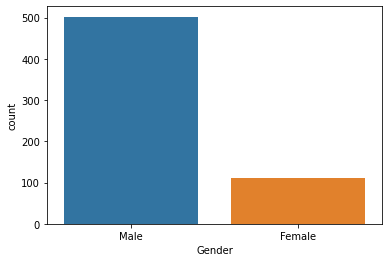

In [137]:
sns.countplot(dt['Gender'])

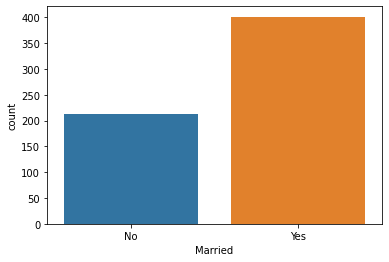

In [138]:
sns.countplot(dt['Married'])

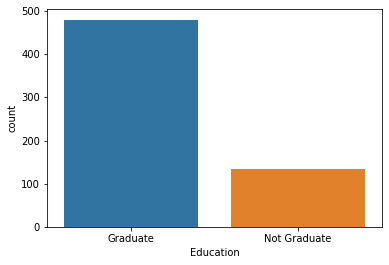

In [139]:
sns.countplot(dt['Education'])

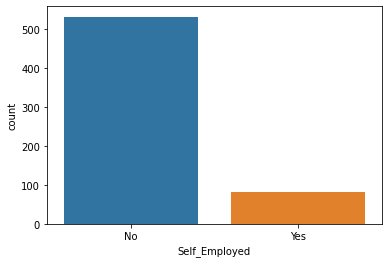

In [140]:
sns.countplot(dt['Self_Employed'])

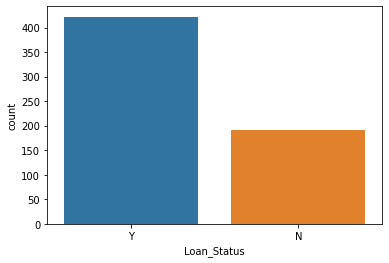

In [141]:
sns.countplot(dt['Loan_Status'])

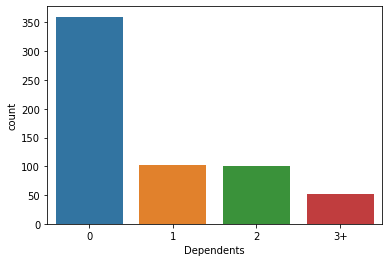

In [142]:
sns.countplot(dt['Dependents'])

Numerical attributes visualisation

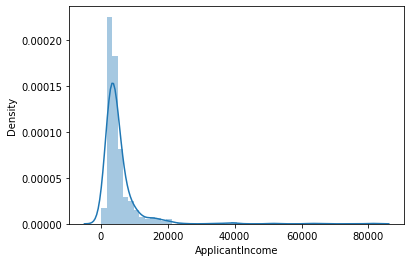

In [143]:
sns.distplot(dt['ApplicantIncome'])

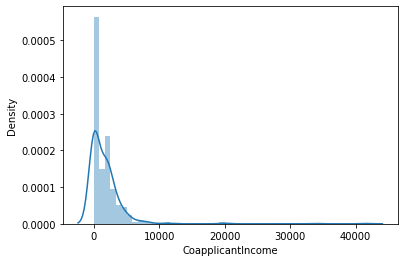

In [144]:
sns.distplot(dt['CoapplicantIncome'])

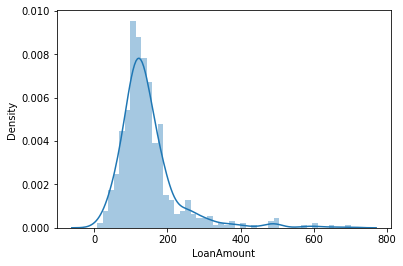

In [145]:
sns.distplot(dt['LoanAmount'])

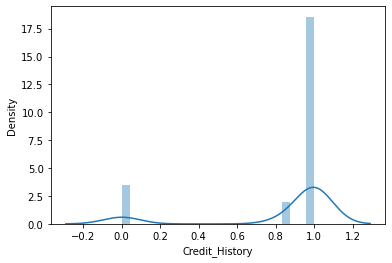

In [146]:
sns.distplot(dt['Credit_History'])

Creation of new attribute

In [147]:
dt['TotalIncome'] = dt['ApplicantIncome']+dt['CoapplicantIncome']
dt['TotalIncome'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: TotalIncome, dtype: float64

Log transformation : The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

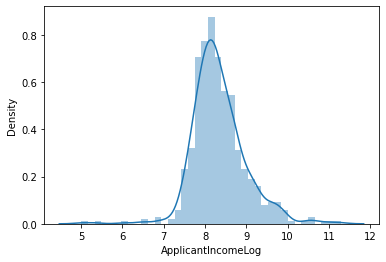

In [148]:
dt['ApplicantIncomeLog']=np.log(dt['ApplicantIncome'])
sns.distplot(dt['ApplicantIncomeLog'])

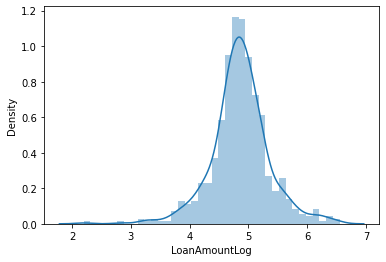

In [149]:
dt['LoanAmountLog']=np.log(dt['LoanAmount'])
sns.distplot(dt['LoanAmountLog'])

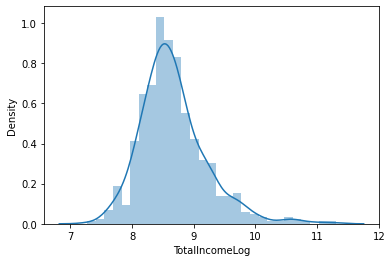

In [150]:
dt['TotalIncomeLog']=np.log(dt['TotalIncome'])
sns.distplot(dt['TotalIncomeLog'])

#Correlation matrix

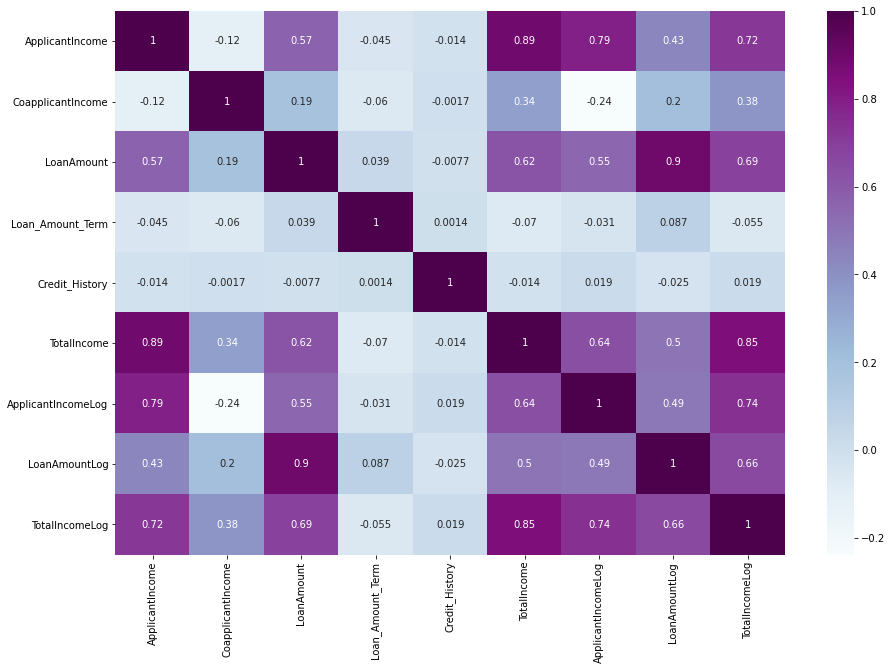

In [151]:
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

In [152]:
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,LoanAmountLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,8.699515


In [153]:
#remove columns with non useful values
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome','Loan_ID']
dt = dt.drop(columns=cols , axis=1)
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,8.699515


#Label Encoding :
To convert categorical columns to numerical columns

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Credit_History      614 non-null    float64
 6   Property_Area       614 non-null    object 
 7   Loan_Status         614 non-null    object 
 8   ApplicantIncomeLog  614 non-null    float64
 9   LoanAmountLog       614 non-null    float64
 10  TotalIncomeLog      614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [213]:
cols = ['Gender','Married','Dependents','Education','Property_Area','Loan_Status','Self_Employed']
le = LabelEncoder()
for i in cols:
  dt[i] = le.fit_transform(dt[i])

In [214]:
dt.head() #All categorical values are numerical now

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,8.699515


#Model Fitting

In [232]:
X = dt.drop(columns=['Loan_Status'],axis=1)
y = dt['Loan_Status']

In [225]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,8.699515,4.948760,8.699515


In [226]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Train-Test Split

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set
print("X_train length",len(X_train))
print("y_train length",len(y_train))
print("X_test length",len(X_test))
print("y_test length",len(y_test))

X_train length 491
y_train length 491
X_test length 123
y_test length 123


In [281]:
from sklearn.model_selection import cross_val_score

In [285]:
def classify_model(model,X,y):
  model.fit(X_train,y_train)
  print("Accuracy is",model.score(X_test,y_test)*100)
  score =   cross_val_score(model ,X,y,cv=5)
  print("Cross Validation score is",np.mean(score)*100)

In [286]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify_model(model,X,y)

Accuracy is 78.86178861788618
Cross Validation score is 80.9462881514061


In [287]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify_model(model,X,y)

Accuracy is 71.54471544715447
Cross Validation score is 73.12808210049315


In [290]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify_model(model,X,y)

Accuracy is 77.23577235772358
Cross Validation score is 78.6711981873917


In [292]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify_model(model,X,y)

Accuracy is 74.79674796747967
Cross Validation score is 76.55204584832734


In [295]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify_model(model,X,y)


Accuracy is 73.98373983739837
Cross Validation score is 79.64680794348926


In [296]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify_model(model,X,y)

Accuracy is 75.60975609756098
Cross Validation score is 76.22550979608157


In [298]:
!pip install catBoost
from catboost import CatBoostClassifier
model = CatBoostClassifier()
classify_model(model,X,y)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6693540	total: 9.95ms	remaining: 1.65s
6:	learn: 0.6660616	total: 10.9ms	remaining: 1.54s
7:	learn: 0.6626756	total: 12.6ms	remaining: 1.56s
8:	learn: 0.6588088	total: 14.3ms	remaining: 1.57s
9:	learn: 0.6550504	total: 15.9ms	remaining: 1.58s
10:	learn: 0.6520379	total: 16.8ms	remaining: 1.51s
11:	learn: 0.6490765	total: 17.6ms	remaining: 1.45s
12:	learn: 0.6454534	total: 19.2ms	remaining: 1.45s
13:	learn: 0.6422874	total: 20.8ms	remaining: 1.47s
14:	learn: 0.6387804	total: 22.5ms	remaining: 1.48s
15:	learn: 0.6355454	total: 24.2ms	remaining: 1.49s
16:	learn: 0.6323689	total: 25.9ms	remaining: 1.5s
17:	learn: 0.6296503	total: 26.8ms	remaining: 1.46s
18:	learn: 0.6265600	total: 28.5ms	remaining: 1.47s
19:	learn: 0.6236290	total: 30.2ms	remaining: 1.48s
20:	learn: 0.6209199	total: 31.4ms	remaining: 1.47s
21:	learn: 0.6179336	total: 33.1ms	remaining: 1.47s
22:	learn: 0.6148837	total: 34.8ms	remaining: 1.48s
23:	learn: 0.612379

#Hyperparameter Tuning

In [299]:
from sklearn.model_selection import RandomizedSearchCV


In [331]:
#define hyperparameters for random forest classifier
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]

In [332]:
random_grid = {"n_estimators":n_estimators,
               "max_features":max_features,
               "max_depth":max_depth,
               "min_samples_split":min_samples_split}

In [333]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100]}


In [334]:
rf = RandomForestClassifier()

In [335]:
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [336]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=300, min_samples_split=100, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, ma

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [337]:
 rf.best_score_

0.8045981607357057

In [338]:
  rf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 100,
 'n_estimators': 700}

#Confusion Matrix

In [341]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[18, 25],
       [ 1, 79]])

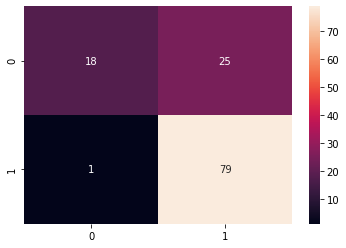

In [342]:
sns.heatmap(cm,annot=True)